# Week 5 - Decision Trees and Random Forests
#### Part 2
### Notebook created by Jonathan Penava
By the end of this lesson you should know what a decision tree algorithm is, how it is constructed, and how to create a machine learning algorithm that uses decision trees.

## Overview
- Data Mining vs Machine Learning
- <span style="color:red;">Decision Trees in Detail</span>
- Decision Tree Example
- Random Forests

Let's examine a decision tree based on a scenario we have looked at in a few previous lectures.  We used Logistic Regression to determine if we would survive the titanic, we can apply decision tree logic to see if we would survive as well.  I am going to start off by loading and preparing our data the same way we did in the prevoius lecture.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

titanic.drop('embark_town', axis=1, inplace=True)
titanic.drop('embarked', axis=1, inplace=True)
titanic.drop('deck', axis=1, inplace=True)
titanic.drop('class', axis=1, inplace=True)
titanic.drop('alive', axis=1, inplace=True)

titanic.replace('male', 0, inplace=True)
titanic.replace('female', 1, inplace=True)
titanic.replace('man', 0, inplace=True)
titanic.replace('woman', 1, inplace=True)
titanic.replace('child', 2, inplace=True)

titanic.dropna(axis=0, inplace=True)

C:\Users\shree\AppData\Local\Temp\ipykernel_22120\1870165292.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace('female', 1, inplace=True)
C:\Users\shree\AppData\Local\Temp\ipykernel_22120\1870165292.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace('child', 2, inplace=True)


The above code should all be familiar, so moving on.  What might be some of the determining factors?  Let's look at our options again.

In [23]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,0,True,False
1,1,1,1,38.0,1,0,71.2833,1,False,False
2,1,3,1,26.0,0,0,7.9250,1,False,True
3,1,1,1,35.0,1,0,53.1000,1,False,False
4,0,3,0,35.0,0,0,8.0500,0,True,True


Sex might be our easiest factor to determine, so let's graph male or female to survival, remembering 1 is female and 0 is male.

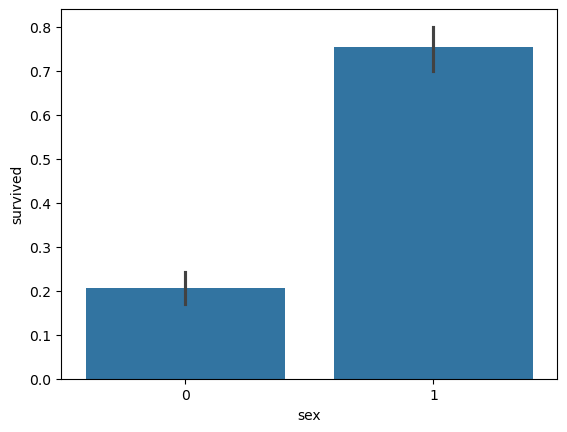

In [24]:
bp=sns.barplot(x='sex', y='survived', data=titanic)

Big difference.  We can see that it is a major factor.  But let's do something here that we didn't do before.  We might want the exact values for each of our bars so let's add those in.

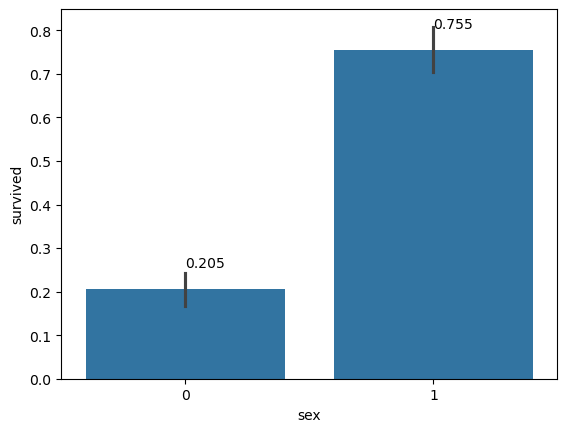

In [25]:
bp=sns.barplot(x='sex', y='survived', data=titanic)
# Add values above bars
for g in bp.patches:
   #The first argument of format gives us the value of our bar to 3 decimals
   #The second argument allows us to position the value where we want.  Play around with the values.
   bp.annotate(format(g.get_height(), '.3f'),(g.get_x() + g.get_width() / 2., g.get_height()+.05))

If we wanted to find out what percentage of the titanic crew were female

In [26]:
titanic[titanic['sex'] == 1].count()/titanic.count()

survived      0.365546
pclass        0.365546
sex           0.365546
age           0.365546
sibsp         0.365546
parch         0.365546
fare          0.365546
who           0.365546
adult_male    0.365546
alone         0.365546
dtype: float64

So we know that there was a 74.2% chance of survival if you were female.  What would our tree start to look like?

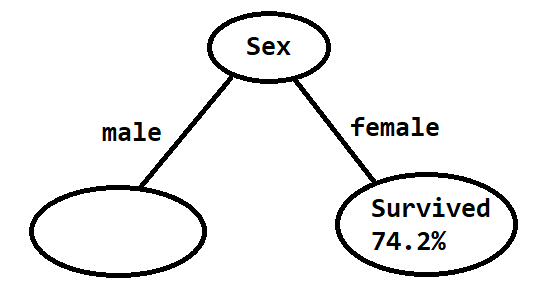

If you are a male, there might be other determining factors. Let's consider another factor, maybe age.  We are going to start by filtering our data to only males:

In [27]:
titanic_male=titanic[titanic['sex'] == 0]

And now we want to graph our age to survivability.

<Axes: xlabel='age', ylabel='survived'>

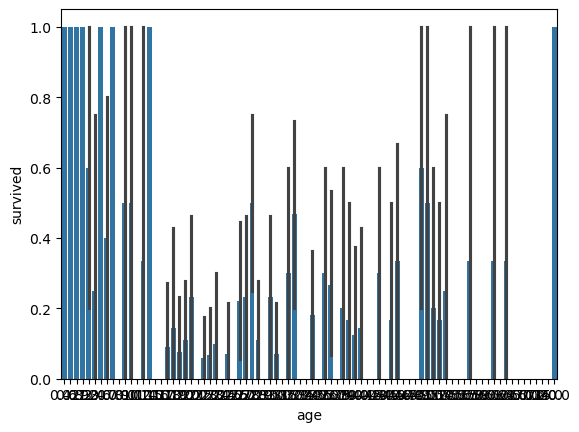

In [28]:
sns.barplot(x='age', y='survived', data=titanic_male)

Doesn't look very good.  Keep in mind what information we gave Seaborn.  Our x values are going to be the ages of each male passenger.  To make this easier for us to understand, we want to sort our information into bins or age groups.

In [29]:

# Define the age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 100]  # Define your age bins as needed

# Create a new column with age bins
titanic_male['AgeGroup'] = pd.cut(titanic_male['age'], bins=age_bins, labels=['0-10', '10-20','20-30','30-40','40-50','50-60', '60+'])


C:\Users\shree\AppData\Local\Temp\ipykernel_22120\761136482.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_male['AgeGroup'] = pd.cut(titanic_male['age'], bins=age_bins, labels=['0-10', '10-20','20-30','30-40','40-50','50-60', '60+'])


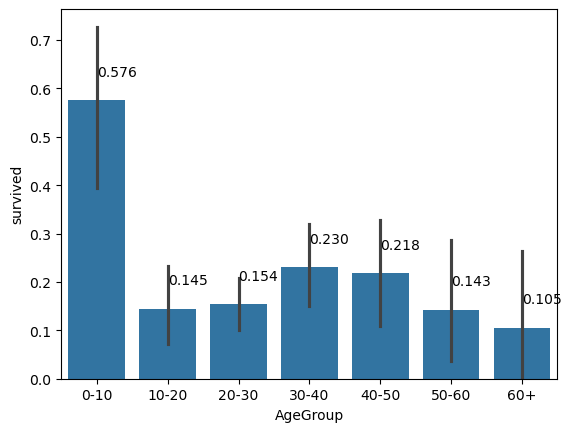

In [30]:
bp=sns.barplot(x='AgeGroup', y='survived', data=titanic_male)
for g in bp.patches:
   bp.annotate(format(g.get_height(), '.3f'),(g.get_x() + g.get_width() / 2., g.get_height()+.05))

We can now see a particular age group that stands out as surviving.  Let's reset the column for Age Group into below 10 and above 10 and try to graph again.

C:\Users\shree\AppData\Local\Temp\ipykernel_22120\4201521997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_male.drop('AgeGroup', axis=1, inplace=True)
C:\Users\shree\AppData\Local\Temp\ipykernel_22120\4201521997.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_male['AgeGroup'] = pd.cut(titanic_male['age'], bins=age_bins, labels=['0-10', '10+'])


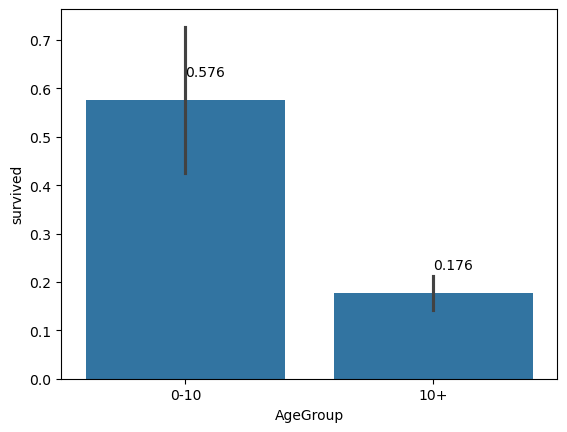

In [31]:
titanic_male.drop('AgeGroup', axis=1, inplace=True)

# Define the age bins
age_bins = [0, 10, 100]  # Define your age bins as needed

# Create a new column with age bins
titanic_male['AgeGroup'] = pd.cut(titanic_male['age'], bins=age_bins, labels=['0-10', '10+'])

bp=sns.barplot(x='AgeGroup', y='survived', data=titanic_male)
for g in bp.patches:
   bp.annotate(format(g.get_height(), '.3f'),(g.get_x() + g.get_width() / 2., g.get_height()+.05))

We can now create another branch to our tree.  If you were over the age of 10 you had a good chance of dying.  Let's add to our diagram.

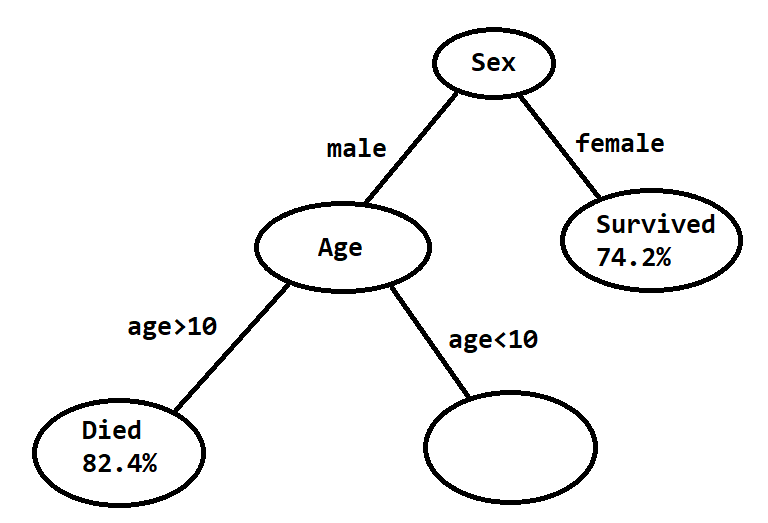

We can continue down this process of drawing our own decision tree, but by now I think you have an idea, let's see what our Machine Algorithm looks like.